In [9]:
import numpy as np
import pandas as pd
import scipy as sp

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# _가우시안 정규분포 나이브 베이즈 모형_

In [2]:
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = sp.stats.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)

In [3]:
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])

In [4]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X, y)

In [11]:
print(model_norm.theta_[0], model_norm.sigma_[0])
print(model_norm.theta_[1], model_norm.sigma_[1])

[-1.96197643 -2.00597903] [1.02398854 2.31390497]
[2.19130701 2.12626716] [1.25429371 1.93742544]


In [15]:
x_new = [-0.7, -0.8]
model_norm.predict_proba([x_new])

array([[0.98300323, 0.01699677]])

In [17]:
likelihood = [
    sp.stats.norm(model_norm.theta_[0], np.sqrt(model_norm.sigma_[0])).pdf(x_new).prod(),
    sp.stats.norm(model_norm.theta_[1], np.sqrt(model_norm.sigma_[1])).pdf(x_new).prod(),
]
likelihood

[0.0346968402917242, 0.0003999540815189114]

In [18]:
model_norm.class_prior_

array([0.4, 0.6])

In [19]:
posterior = likelihood * model_norm.class_prior_
posterior

array([0.01387874, 0.00023997])

In [20]:
posterior / posterior.sum()

array([0.98300323, 0.01699677])

In [ ]:
# 연습문제 1 : 붓꽃 분류 문제를 가우시안 나이브 베이즈 모형을 사용하여 풀고 다음을 구하라.
# confusion matrix, classification report

In [35]:
from sklearn.naive_bayes import GaussianNB

In [22]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [23]:
X = df.iloc[:, :4]
y = df.iloc[:, 4:]

In [25]:
y.tail()

,species
145,virginica
146,virginica
147,virginica
148,virginica
149,virginica


In [28]:
model_iris = GaussianNB().fit(X, y)
model_iris

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [30]:
y_pred = model_iris.predict(X)
y_true = y.copy()

In [33]:
print(confusion_matrix(y_true, y_pred))

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


In [34]:
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.94      0.94      0.94        50
  virginica       0.94      0.94      0.94        50

avg / total       0.96      0.96      0.96       150



# _베르누이 분포 나이브 베이즈 모형_

In [38]:
X = np.array([
    [0, 1, 1, 0],
    [1, 1, 1, 1],
    [1, 1, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [0, 1, 1, 0]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [39]:
from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB().fit(X, y)

In [45]:
print(model_bern.classes_)
print(model_bern.class_count_)
print(np.exp(model_bern.class_log_prior_))

[0 1]
[4. 6.]
[0.4 0.6]


In [47]:
fc = model_bern.feature_count_
fc

array([[2., 4., 3., 1.],
       [2., 3., 5., 3.]])

In [62]:
fc / np.repeat(model_bern.class_count_[:, np.newaxis], 4, axis=1)

array([[0.5       , 1.        , 0.75      , 0.25      ],
       [0.33333333, 0.5       , 0.83333333, 0.5       ]])

In [66]:
# 이미 스무딩한 결과
np.exp(model_bern.feature_log_prob_)

array([[0.5       , 0.83333333, 0.66666667, 0.33333333],
       [0.375     , 0.5       , 0.75      , 0.5       ]])

In [67]:
x_new = np.array([1, 1, 0, 0])
x_new

array([1, 1, 0, 0])

In [68]:
model_bern.predict_proba([x_new])

array([[0.72480181, 0.27519819]])

In [ ]:
# 연습문제 2 : MNIST Digit 분류 문제에서 sklearn.preprocessing.Binarizer로 x값을 0, 1로 바꾼다(값이 8 이상이면 1, 8 미만이면 0). 
# 즉 흰색과 검은색 픽셀로만 구성된 이미지로 만든다. 이 이미지에 대해 베르누이 나이브 베이즈 모형을 적용한다.

In [3]:
# binarizer 불러와서 객체 생성하기

from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=8)

In [4]:
# 데이터 불러오기

from sklearn.datasets import load_digits
X = load_digits().data
y = load_digits().target

In [73]:
binarizer.fit_transform(X)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [6]:
from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB().fit(X, y)

In [7]:
y_true = y.copy()
y_pred = model_bern.predict(X)

In [10]:
print(confusion_matrix(y_true, y_pred))

[[175   1   0   0   2   0   0   0   0   0]
 [  0 112  21   0   3   1   1   1  32  11]
 [  0   6 153   6   0   0   0   1  11   0]
 [  1   1   3 157   0   2   0   3   7   9]
 [  0   1   0   0 172   0   0   7   1   0]
 [  2   3   0   2   1 149   2   0   3  20]
 [  0   5   0   0   2   2 171   0   1   0]
 [  0   0   0   0   3   0   0 175   1   0]
 [  0  13   1   4   0   3   2   2 142   7]
 [  0   6   0   3   7   3   0   9   6 146]]


In [11]:
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       178
          1       0.76      0.62      0.68       182
          2       0.86      0.86      0.86       177
          3       0.91      0.86      0.88       183
          4       0.91      0.95      0.93       181
          5       0.93      0.82      0.87       182
          6       0.97      0.94      0.96       181
          7       0.88      0.98      0.93       179
          8       0.70      0.82      0.75       174
          9       0.76      0.81      0.78       180

avg / total       0.87      0.86      0.86      1797



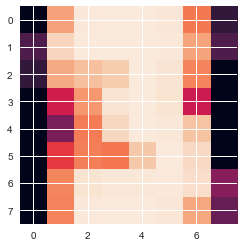

In [88]:
theta = model_bern.feature_log_prob_
plt.imshow(theta[3].reshape(8, 8))

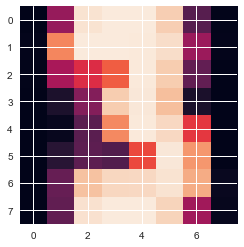

In [89]:
theta = np.exp(model_bern.feature_log_prob_)
plt.imshow(theta[3].reshape(8, 8))

# _다항분포 나이브 베이즈 모형_

In [2]:
X = np.array([    
    [3, 4, 1, 2],
    [3, 5, 1, 1],
    [3, 3, 0, 4],
    [3, 4, 1, 2],
    [1, 2, 1, 4],
    [0, 0, 5, 3],
    [1, 2, 4, 1],
    [1, 1, 4, 2],
    [0, 1, 2, 5],
    [2, 1, 2, 3]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [14]:
from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(X, y)

In [15]:
print(model_mult.classes_)
print(model_mult.class_count_)
print(np.exp(model_mult.class_log_prior_))

[0 1 2 3 4 5 6 7 8 9]
[178. 182. 177. 183. 181. 182. 181. 179. 174. 180.]
[0.09905398 0.10127991 0.0984975  0.10183639 0.10072343 0.10127991
 0.10072343 0.09961046 0.09682805 0.10016694]


In [97]:
# x_new = np.array([10, 10, 10, 10])
# model_mult.predict_proba([x_new])

array([[0.38848858, 0.61151142]])

In [ ]:
model_mult.predict_proba(X)

In [8]:
theta = np.exp(model_mult.feature_log_prob_)
theta

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

In [ ]:
p = (theta ** x_new).prod(axis=1)*np.exp(model_bern.class_log_prior_)
p / p.sum()

In [ ]:
# 연습문제 3

In [98]:
from sklearn.datasets import load_digits
X = load_digits().data
y = load_digits().target

In [99]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X, y)

In [100]:
y_pred = model.predict(X)
y_true = y

In [101]:
print(confusion_matrix(y_true, y_pred))
print("-" * 50)
print(classification_report(y_true, y_pred))

[[175   0   0   0   3   0   0   0   0   0]
 [  0 137  14   0   0   1   2   0  13  15]
 [  0   7 160   0   0   0   0   0   8   2]
 [  0   0   2 159   0   2   0   5   8   7]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  11   1   0   1   0   1   1 154   5]
 [  0   1   0   1   1   1   0  11   7 158]]
--------------------------------------------------
             precision    recall  f1-score   support

          0       0.99      0.98      0.99       178
          1       0.87      0.75      0.81       182
          2       0.90      0.90      0.90       177
          3       0.99      0.87      0.93       183
          4       0.96      0.96      0.96       181
          5       0.97      0.86      0.91       182
          6       0.98      0.97      0.98       181
          7       0.89      0.99      0.94       179
          8       0.78      0.89      0.

In [102]:
theta = model.feature_log_prob_
theta[0]

array([-10.94162417,  -9.33218625,  -4.32689857,  -3.18714262,
        -3.33473964,  -4.68395658,  -8.99571402, -10.94162417,
       -10.94162417,  -5.87271996,  -3.22739302,  -3.16634832,
        -3.31749358,  -3.32780548,  -5.78833257, -10.94162417,
       -10.94162417,  -4.44183713,  -3.10091771,  -4.09787422,
        -5.01469814,  -3.26052517,  -4.499084  , -10.94162417,
       -10.94162417,  -4.09255788,  -3.21673573,  -5.06669344,
        -7.68352763,  -3.55515332,  -3.89497689, -10.94162417,
       -10.94162417,  -3.98889552,  -3.31213425,  -5.86645035,
        -8.74439959,  -3.58726184,  -3.7956397 , -10.94162417,
       -10.94162417,  -4.50707765,  -3.17266812,  -5.25464881,
        -5.32849606,  -3.33374609,  -3.99176771, -10.94162417,
       -10.94162417,  -5.97877954,  -3.19014885,  -3.460632  ,
        -3.42247421,  -3.17520727,  -4.87551608, -10.94162417,
       -10.94162417, -10.24847699,  -4.33362354,  -3.1521696 ,
        -3.16971391,  -4.06535955,  -7.02960116, -10.94

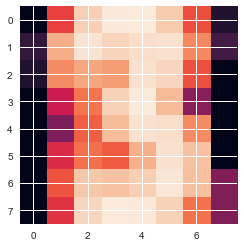

In [103]:
plt.imshow(theta[3].reshape(8, 8))

# _뉴스 그룹 분류_

In [106]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(subset='all')
X = news.data
y = news.target

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer

In [119]:
model1 = Pipeline([
    ('vect', CountVectorizer()),
    ('model', MultinomialNB()),
])

model2 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [110]:
from sklearn.model_selection import cross_val_score, KFold

In [120]:
%%time
from sklearn.model_selection import cross_val_score, KFold

for i, model in enumerate([model1, model2]):
    scores = cross_val_score(model, X, y, cv=5)
    print(("Model{0:d}: Mean score: {1:.3f}").format(i, np.mean(scores)))

Model0: Mean score: 0.855
Model1: Mean score: 0.856
CPU times: user 1min 9s, sys: 2.14 s, total: 1min 12s
Wall time: 1min 12s


# _나이브 베이즈 분류모형을 이용한 감성 분석_

In [2]:
!wget

/bin/sh: wget: command not found


In [3]:
%%time
!wget -nc https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
!wget -nc https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt

/bin/sh: wget: command not found
/bin/sh: wget: command not found
CPU times: user 9.68 ms, sys: 16.9 ms, total: 26.6 ms
Wall time: 253 ms


In [ ]:
import codecs
with codecs.open("ratings_train.txt", encoding='utf-8') as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:]   # header 제외